In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
pd.isnull(data).sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
to_change = {}

with open("dictionary.txt", 'r') as file:
    file_data = file.read().replace(" ", "")
    for info in file_data.split():
        current = {}
        for i in info.split(":")[1].split(","):
            value = i.split("=")[0]
            key = i.split("=")[1]
            current[key] = value
        to_change[info.split(":")[0]] = current
        
# to_change

In [7]:
for c in to_change:
    data[c] = data[c].apply(lambda x: to_change[c][x])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for c in data.columns:
    data[c] = le.fit_transform(data[c])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,2,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,2,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,2,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


In [9]:
data.corr()["class"][1:]

cap-shape                   0.199488
cap-surface                 0.186806
cap-color                   0.058452
bruises                     0.501530
odor                       -0.086800
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.270247
stalk-shape                -0.102019
stalk-root                  0.094766
stalk-surface-above-ring   -0.215088
stalk-surface-below-ring   -0.139254
stalk-color-above-ring     -0.263928
stalk-color-below-ring     -0.245231
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.519438
population                  0.298686
habitat                    -0.022363
Name: class, dtype: float64

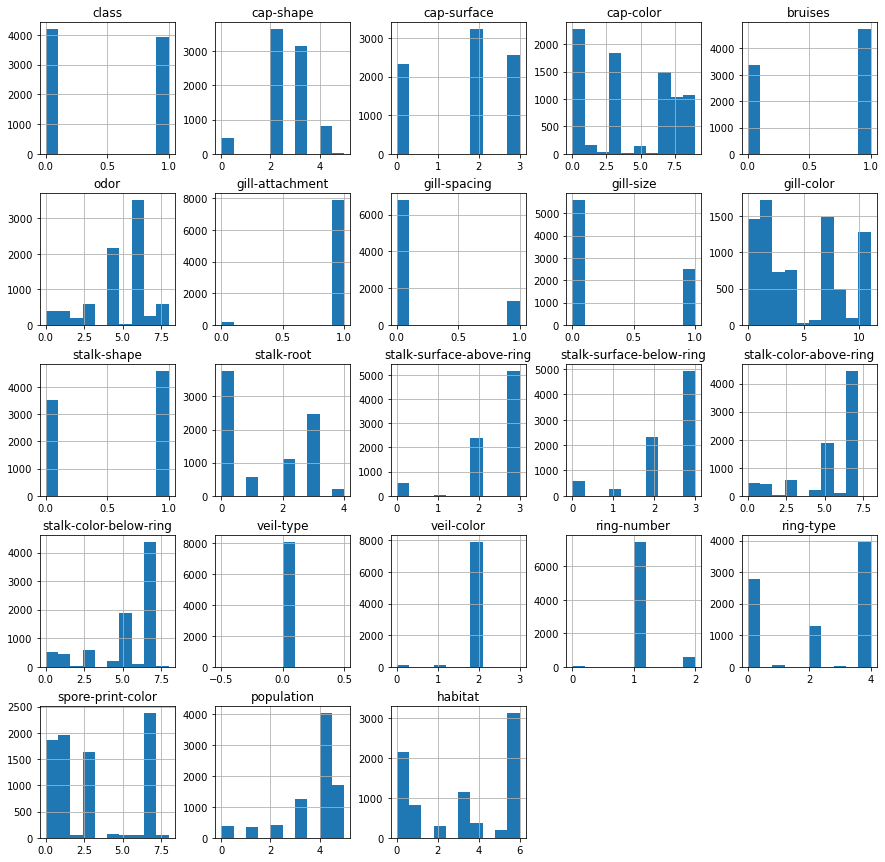

In [10]:
data.hist(bins=10, figsize=(15, 15));

In [11]:
del data["veil-type"]

In [12]:
label = data.iloc[:, 0]
features = data.iloc[:, 1:23]

scaler = preprocessing.StandardScaler()
standard_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
standard_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,-0.545782,1.065669,-1.255302,-1.185917,1.115027,0.162896,-0.438864,1.494683,-1.415071,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-1.083856,-0.514389,0.307811
1,-0.545782,1.065669,1.357802,-1.185917,-2.413988,0.162896,-0.438864,-0.669038,-1.415071,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-0.729891,-1.313108,-1.272882
2,-2.764967,1.065669,1.067457,-1.185917,-1.909843,0.162896,-0.438864,-0.669038,-1.115866,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-0.729891,-1.313108,-0.482535
3,-0.545782,0.217892,1.067457,-1.185917,1.115027,0.162896,-0.438864,1.494683,-1.115866,-1.144806,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,0.948081,-1.083856,-0.514389,0.307811
4,-0.545782,1.065669,-0.384267,0.843230,0.610882,0.162896,2.278612,-0.669038,-1.415071,0.873511,...,0.615908,0.660796,0.724622,0.732112,0.142037,-0.256132,-1.272216,-0.729891,-2.910546,-1.272882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.673403,1.065669,-1.255302,0.843230,0.610882,-6.138869,-0.438864,-0.669038,1.876178,-1.144806,...,0.615908,0.660796,-0.674783,-0.634961,-3.979055,-0.256132,0.948081,-0.375925,-2.111827,-0.877709
8120,-0.545782,1.065669,-1.255302,0.843230,0.610882,-6.138869,-0.438864,-0.669038,1.876178,-1.144806,...,0.615908,0.660796,-0.674783,-0.634961,-8.100146,-0.256132,0.948081,-0.375925,0.284330,-0.877709
8121,0.563811,1.065669,-1.255302,0.843230,0.610882,-6.138869,-0.438864,-0.669038,-1.115866,-1.144806,...,0.615908,0.660796,-0.674783,-0.634961,-3.979055,-0.256132,0.948081,-0.375925,-2.111827,-0.877709
8122,1.673403,0.217892,-1.255302,0.843230,-0.901553,0.162896,-0.438864,1.494683,-0.816662,0.873511,...,0.615908,-0.488242,0.724622,0.732112,0.142037,-0.256132,-1.272216,1.393903,0.284330,-0.877709


In [13]:
normalizer = preprocessing.Normalizer()
normal_features = pd.DataFrame(normalizer.fit_transform(features), columns=features.columns)
normal_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.131876,0.197814,0.000000,0.000000,0.461566,0.065938,0.000000,0.065938,0.000000,0.000000,...,0.197814,0.197814,0.461566,0.461566,0.131876,0.065938,0.263752,0.000000,0.197814,0.263752
1,0.129641,0.194461,0.583383,0.000000,0.000000,0.064820,0.000000,0.000000,0.000000,0.000000,...,0.194461,0.194461,0.453743,0.453743,0.129641,0.064820,0.259281,0.064820,0.129641,0.000000
2,0.000000,0.200895,0.535720,0.000000,0.066965,0.066965,0.000000,0.000000,0.066965,0.000000,...,0.200895,0.200895,0.468755,0.468755,0.133930,0.066965,0.267860,0.066965,0.133930,0.133930
3,0.117444,0.117444,0.469776,0.000000,0.411054,0.058722,0.000000,0.058722,0.058722,0.000000,...,0.176166,0.176166,0.411054,0.411054,0.117444,0.058722,0.234888,0.000000,0.176166,0.234888
4,0.145865,0.218797,0.218797,0.072932,0.437595,0.072932,0.072932,0.000000,0.000000,0.072932,...,0.218797,0.218797,0.510527,0.510527,0.145865,0.072932,0.000000,0.072932,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.245256,0.183942,0.000000,0.061314,0.367884,0.000000,0.000000,0.000000,0.674453,0.000000,...,0.183942,0.183942,0.245256,0.245256,0.061314,0.061314,0.245256,0.122628,0.061314,0.061314
8120,0.122169,0.183254,0.000000,0.061085,0.366508,0.000000,0.000000,0.000000,0.671932,0.000000,...,0.183254,0.183254,0.244339,0.244339,0.000000,0.061085,0.244339,0.122169,0.244339,0.061085
8121,0.254457,0.254457,0.000000,0.084819,0.508913,0.000000,0.000000,0.000000,0.084819,0.000000,...,0.254457,0.254457,0.339276,0.339276,0.084819,0.084819,0.339276,0.169638,0.084819,0.084819
8122,0.264906,0.132453,0.000000,0.066227,0.198680,0.066227,0.000000,0.066227,0.132453,0.066227,...,0.198680,0.132453,0.463586,0.463586,0.132453,0.066227,0.000000,0.463586,0.264906,0.066227


In [14]:
# First model using KNN (5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=5)

# Normalization best accuracy: 0.9566884191009397
# Standarization best accuracy:0.9664180890577379
features = standard_features

X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 1.0


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [21]:
from sklearn.model_selection import cross_val_score
cv_model = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(cv_model, features.values, label, cv=10)
print(cv_scores)
print("cv_scores mean: " + str(np.mean(cv_scores)))

[0.7195572  1.         1.         1.         0.99137931 1.
 1.         1.         0.88423645 1.        ]
cv_scores mean: 0.9595172959118754


In [22]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 25)}

gscv_model = GridSearchCV(knn2, param_grid, cv=10)

gscv_model.fit(features.values, label.values)
print("best n_neighbors: " + str(gscv_model.best_params_["n_neighbors"]))
print("its score: " + str(gscv_model.best_score_))

best n_neighbors: 1
its score: 0.9712154399869121


In [19]:
print("n | Accuracy")
for n in range(1,25):
    cv_model = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(cv_model, features.values, label.values, cv=10)
    print(str(n) + " | " + str(np.mean(cv_scores)))

n | Accuracy
1 | 0.9712154399869121
2 | 0.9696164239967523
3 | 0.9603792133980452
4 | 0.9587792885318015
5 | 0.9595172959118754
6 | 0.9581635249850035
7 | 0.9569315434533655
8 | 0.9557009252358533
9 | 0.956438932615927
10 | 0.955700773756506
11 | 0.9561927786765552
12 | 0.9559472306545725
13 | 0.9564393870539689
14 | 0.955946927695878
15 | 0.9553308611903851
16 | 0.954838856270336
17 | 0.9506516641521097
18 | 0.9507751198201639
19 | 0.9504055102127378
20 | 0.9505289658807918
21 | 0.949174134598489
22 | 0.9494204400172082
23 | 0.9490502244923927
24 | 0.9497894437072452
